(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

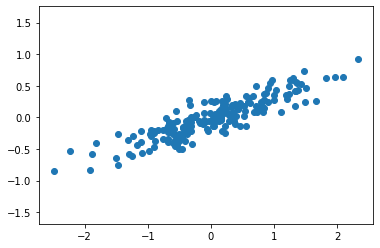

In [2]:
# PCA 주성분 분석 실습 

# PCA를 위한 자료 준비
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [5]:
# 성분(component): 벡터의 방향
# 설명 분산(explained variance): 해당 벡터의 제곱 길이
from sklearn.decomposition import PCA
mypca = PCA(n_components = 2)
mypca.fit(X)

print(mypca.components_)
print()
print(mypca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

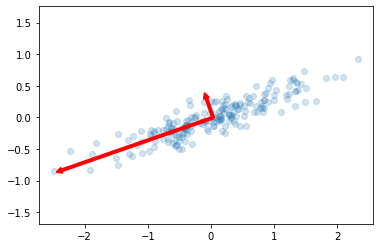

In [7]:
def draw_vector(v0, v1, ax = None):
  ax = ax or plt.gca()
  arrowprops = dict(color = 'red',
                    arrowstyle = 'simple',
                    linewidth = 2,
                    shrinkA = 0,
                    shrinkB = 0)
  ax.annotate('', v1, v0, arrowprops = arrowprops)

# data plotting
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)

for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(mypca.mean_, mypca.mean_ + v)

plt.axis('equal')

In [10]:
# 차원 축소에의 응용
# -> 가장 작은 주성분 중 하나를 삭제해 최대 데이터 분산을 보존하는 더 작은 차원으로 데이터를 사용함
dimpca = PCA(n_components = 1)
dimpca.fit(X)

X_pca = dimpca.transform(X)

print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

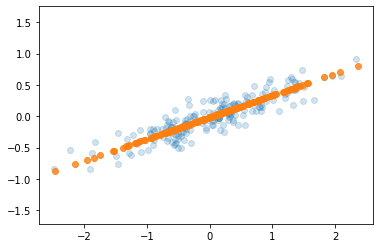

In [12]:
# 차원 축소 - 자료 출력

# 역변환
X_new = dimpca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis('equal')

In [14]:
# PCA 특징 추출 - 얼굴 특징 추출 실습

# 고유 얼굴 성분 찾기
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [15]:
from sklearn.decomposition import PCA
face_pca = PCA(150)
face_pca.fit(faces.data)

PCA(n_components=150)

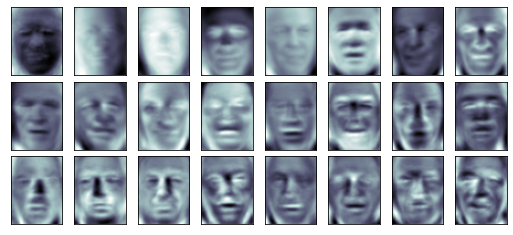

In [17]:
fig, axes = plt.subplots(3, 8, figsize = (9, 4),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat): 
  ax.imshow(face_pca.components_[i].reshape(62, 47), cmap = 'bone')